# AI/ML Job Analysis in MENA - Simplified Version
This notebook collects and analyzes AI/ML job data from Wuzzuf.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import markdown2
import pdfkit

def scrape_jobs():
    url = "https://wuzzuf.net/search/jobs/?a=spbg&q=machine%20learning"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    jobs = []
    cards = soup.find_all("div", {"class": "css-1gatmva"})

    for card in cards:
        title = card.find("h2").text.strip() if card.find("h2") else "N/A"
        company = card.find("a", {"class": "css-17s97q8"}).text.strip() if card.find("a", {"class": "css-17s97q8"}) else "N/A"
        location = card.find("span", {"class": "css-5wys0k"}).text.strip() if card.find("span", {"class": "css-5wys0k"}) else "N/A"
        skills = "Machine Learning, Python, AI"

        jobs.append({
            "Job Title": title,
            "Company": company,
            "Location": location,
            "Skills": skills
        })

    df = pd.DataFrame(jobs)
    df.to_csv("jobs.csv", index=False)
    print("[✓] Data scraped and saved to jobs.csv")

def analyze_trends():
    df = pd.read_csv("jobs.csv")

    top_titles = df["Job Title"].value_counts().head(10)
    top_locations = df["Location"].value_counts()

    all_skills = []
    for s in df["Skills"]:
        all_skills.extend([skill.strip() for skill in s.split(",")])
    top_skills = Counter(all_skills).most_common(10)

    top_titles.plot(kind="barh", title="Top AI/ML Job Titles")
    plt.tight_layout()
    plt.savefig("Output/titles.png")
    plt.clf()

    top_locations.plot(kind="barh", title="Jobs by Location")
    plt.tight_layout()
    plt.savefig("Output/locations.png")
    plt.clf()

    skill_labels, skill_counts = zip(*top_skills)
    plt.barh(skill_labels, skill_counts)
    plt.title("Top Skills")
    plt.tight_layout()
    plt.savefig("Output/skills.png")
    plt.clf()

    return top_titles, top_skills, top_locations

def generate_report():
    titles, skills, locations = analyze_trends()

    md = "# Top AI/ML Jobs in MENA – May 2025\n\n"
    md += "## Top 10 Job Titles\n"
    for title, count in titles.items():
        md += f"- {title} ({count})\n"

    md += "\n## Most Required Skills\n"
    for skill, count in skills:
        md += f"- {skill} ({count})\n"

    md += "\n## Job Distribution by Location\n"
    for location, count in locations.items():
        md += f"- {location} ({count})\n"

    md += "\n## Visualizations\n"
    md += "![Top Titles](Output/titles.png)\n"
    md += "![Top Skills](Output/skills.png)\n"
    md += "![Locations](Output/locations.png)\n"

    with open("report.md", "w", encoding="utf-8") as f:
        f.write(md)

    html = markdown2.markdown_path("report.md")
    config = pdfkit.configuration(wkhtmltopdf=r"C:\\Program Files\\wkhtmltopdf\\bin\\wkhtmltopdf.exe")
    options = {
        'enable-local-file-access': '', 
    }
    pdfkit.from_string(html, "Output/report.pdf", configuration=config, options=options)
    print("[✓] Report generated as report.pdf")



In [4]:
scrape_jobs()
generate_report()


[✓] Data scraped and saved to jobs.csv
[✓] Report generated as report.pdf


<Figure size 640x480 with 0 Axes>

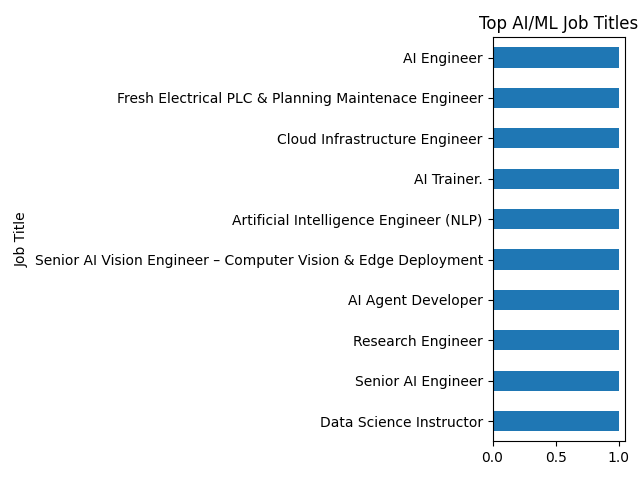

In [5]:
# 📷 Optional: View one of the charts inside the notebook
from IPython.display import Image
Image("titles.png")
